##Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

##Exploratory Analysis of Features

In [2]:
features_df = pd.read_csv('/content/features.csv')
features_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

Metadata of Features

* Store - Store Number.
* Date - Date of the year.
* Temperature - Average temperature in the region.
* Fuel_Price  - Cost of fuel in the region.
* MarkDown 1-5 - Anonymous data related to promotional markdowns that walmart is running.
* CPI - Consumer Price Index
* Unemployment - The unemployment rate
* IsHoliday - Holiday week or not

In [3]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [4]:
features_df.shape

(8190, 12)

In [5]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [6]:
features_df.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

##Exploratory Analysis of Stores

In [7]:
stores_df = pd.read_csv('/content/stores.csv')
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

Metadata about Stores
* Store - Store Number
* Type - Type of Store
* Size - Size of the store

In [8]:
stores_df.shape

(45, 3)

In [9]:
stores_df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [10]:
stores_df['Size'].min(), stores_df['Size'].max()

(34875, 219622)

In [11]:
stores_df.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

In [12]:
stores_df['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [13]:
labels = stores_df['Type'].value_counts().index
values = stores_df['Type'].value_counts().values
colors = stores_df['Type']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])
fig.show()

##Exploratory Analysis of Train and Test data with Visualizations

In [14]:
train_df = pd.read_csv('/content/train.csv')
train_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [15]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

Metadata of Dataset
* Store - Store Number
* Dept - Department Number
* Date - Date of the year
* IsHoliday - Holiday week or not

In [16]:
test_df.shape, train_df.shape

((115064, 4), (421570, 5))

In [17]:
train_df['Dept'].nunique()

81

In [18]:
train_df['Store'].nunique()

45

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [20]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [21]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [22]:
train_df.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [23]:
train_df['Dept'].value_counts()

1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [24]:
labels = train_df['Dept'].value_counts()[40:60].index
values = train_df['Dept'].value_counts()[40:60].values
colors = train_df['Dept']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])
fig.show()

In [25]:
train_df['Store'].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [26]:
labels = train_df['Store'].value_counts()[20:45].index
values = train_df['Store'].value_counts()[20:45].values
colors = train_df['Store']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])
fig.show()

In [27]:
train_df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [28]:
labels = train_df['IsHoliday'].value_counts().index
values = train_df['IsHoliday'].value_counts().values
colors = train_df['IsHoliday']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])
fig.show()

##Data Preprocessing with some Visualizations

In [29]:
dataset = features_df.merge(stores_df, how='inner', on='Store')
dataset.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.242170         8.106       True    A   
2        NaN        NaN        NaN  211.289143         8.106      False    A   
3        NaN        NaN        NaN  211.319643         8.106      False    A   
4        NaN        NaN        NaN  211.350143         8.106      False    A   

     Size  
0  151315  
1  151315  
2  151315  
3  151315  
4  151315

In [30]:
dataset.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [32]:
dataset.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  \
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000   
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821   
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259   
min      -179.260000      0.220000    -185.170000   126.064000      3.684000   
25%         6.600000    304.687500    1440.827500   132.364839      6.634000   
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000   
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000   
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000   

                Size  
count    8190.000000  
mean   130287.600000  
std     63115.971429  
min     34875.000000  
25%     70713.000000  
50%    126512.000000  
75%    202307.000000  
max    219622.000000

In [33]:
# labels = dataset['Type'].value_counts().index
# values = dataset['Type'].value_counts().values
# colors = dataset['Type']

# fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])
# fig.show()

In [34]:
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 903.8+ KB


In [36]:
# dataset['Week'] = dataset['Date'].dt.week

In [37]:
dataset['Week'] = [x.week for x in dataset['Date']]
dataset['Year'] = [x.year for x in dataset['Date']]
dataset.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  \
0        NaN        NaN  211.096358         8.106      False    A  151315   
1        NaN        NaN  211.242170         8.106       True    A  151315   
2        NaN        NaN  211.289143         8.106      False    A  151315   
3        NaN        NaN  211.319643         8.106      False    A  151315   
4        NaN        NaN  211.350143         8.106      False    A  151315   

   Week  Year  
0     5  2010  
1     6  2010  
2     7  2010  
3     8  2010  
4     9  2010

In [38]:
train_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [39]:
train_merge = dataset.merge(train_df, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True)
train_merge

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0           1 2010-02-05        42.31       2.572        NaN        NaN   
1           1 2010-02-12        38.51       2.548        NaN        NaN   
2           1 2010-02-19        39.93       2.514        NaN        NaN   
3           1 2010-02-26        46.63       2.561        NaN        NaN   
4           1 2010-03-05        46.50       2.625        NaN        NaN   
...       ...        ...          ...         ...        ...        ...   
421565     45 2012-09-28        64.88       3.997    4556.61      20.64   
421566     45 2012-10-05        64.89       3.985    5046.74        NaN   
421567     45 2012-10-12        54.47       4.000    1956.28        NaN   
421568     45 2012-10-19        56.47       3.969    2004.02        NaN   
421569     45 2012-10-26        58.85       3.882    4018.91      58.08   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0             NaN        NaN        NaN  211.096358         8.106      False   
1             NaN        NaN        NaN  211.242170         8.106       True   
2             NaN        NaN        NaN  211.289143         8.106      False   
3             NaN        NaN        NaN  211.319643         8.106      False   
4             NaN        NaN        NaN  211.350143         8.106      False   
...           ...        ...        ...         ...           ...        ...   
421565       1.50    1601.01    3288.25  192.013558         8.684      False   
421566      18.82    2253.43    2340.01  192.170412         8.667      False   
421567       7.89     599.32    3990.54  192.327265         8.667      False   
421568       3.18     437.73    1537.49  192.330854         8.667      False   
421569     100.00     211.94     858.33  192.308899         8.667      False   

       Type    Size  Week  Year  Dept  Weekly_Sales  
0         A  151315     5  2010     1      24924.50  
1         A  151315     6  2010     1      46039.49  
2         A  151315     7  2010     1      41595.55  
3         A  151315     8  2010     1      19403.54  
4         A  151315     9  2010     1      21827.90  
...     ...     ...   ...   ...   ...           ...  
421565    B  118221    39  2012    98        508.37  
421566    B  118221    40  2012    98        628.10  
421567    B  118221    41  2012    98       1061.02  
421568    B  118221    42  2012    98        760.01  
421569    B  118221    43  2012    98       1076.80  

[421570 rows x 18 columns]

In [40]:
test_df.head()

Store  Dept       Date  IsHoliday
0      1     1 2012-11-02      False
1      1     1 2012-11-09      False
2      1     1 2012-11-16      False
3      1     1 2012-11-23       True
4      1     1 2012-11-30      False

In [41]:
test_merge = dataset.merge(test_df, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True)
test_merge.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2012-11-02        55.32       3.386    6766.44    5147.70      50.82   
1      1 2012-11-09        61.24       3.314   11421.32    3370.89      40.28   
2      1 2012-11-16        52.92       3.252    9696.28     292.10     103.78   
3      1 2012-11-23        56.23       3.211     883.59       4.17   74910.32   
4      1 2012-11-30        52.34       3.207    2460.03        NaN    3838.35   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  \
0    3639.90    2737.42  223.462779         6.573      False    A  151315   
1    4646.79    6154.16  223.481307         6.573      False    A  151315   
2    1133.15    6612.69  223.512911         6.573      False    A  151315   
3     209.91     303.32  223.561947         6.573       True    A  151315   
4     150.57    6966.34  223.610984         6.573      False    A  151315   

   Week  Year  Dept  
0    44  2012     1  
1    45  2012     1  
2    46  2012     1  
3    47  2012     1  
4    48  2012     1

<Axes: >

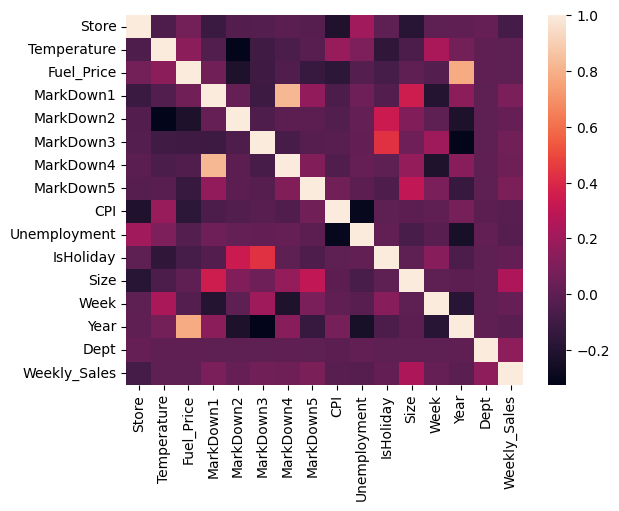

In [42]:
sns.heatmap(train_merge.corr(numeric_only=True))

<Axes: >

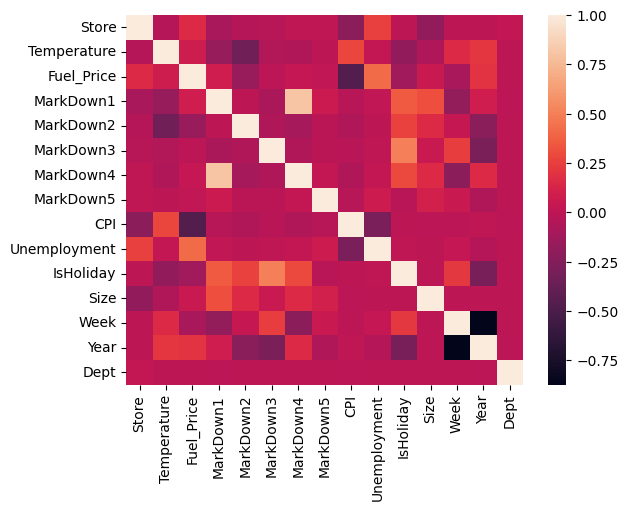

In [43]:
sns.heatmap(test_merge.corr(numeric_only=True))

In [44]:
import random
colors=['Purple', 'Orange', 'Green', 'Crimson', 'Blue', 'Red', 'Gray', 'Brown', 'Magenta']
def scatter(train_merge, column):
  plt.figure(figsize=(7,3))
  plt.scatter(train_merge[column], train_merge['Weekly_Sales'], c=random.choice(colors))
  plt.xlabel(column)
  plt.ylabel('weekly_Sales')

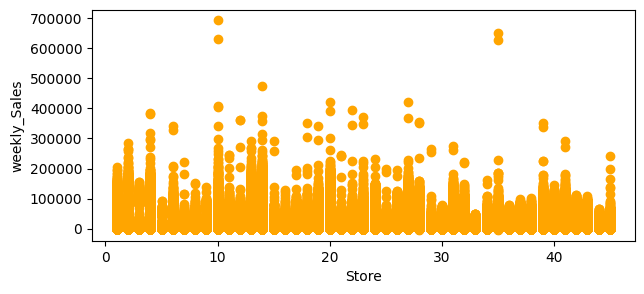

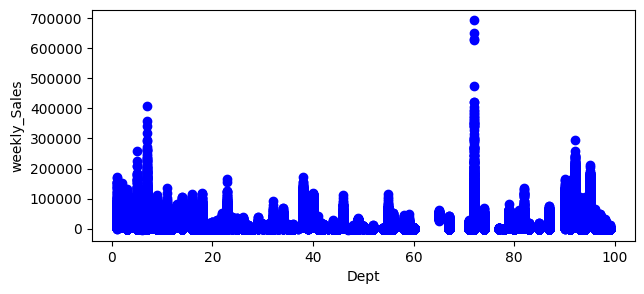

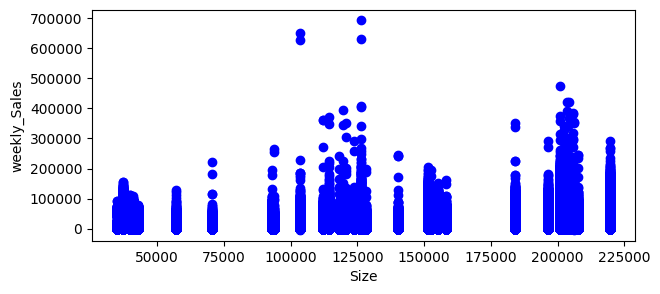

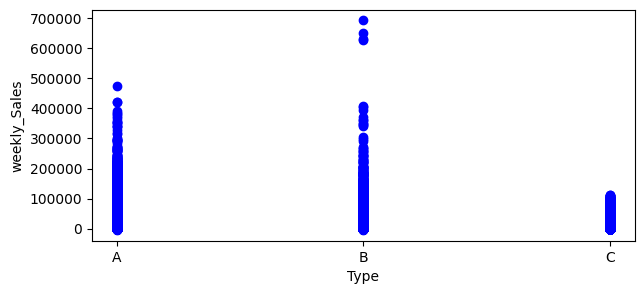

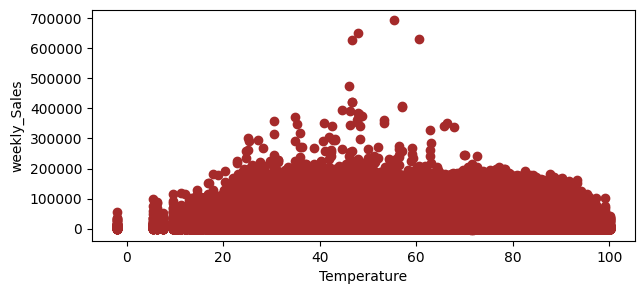

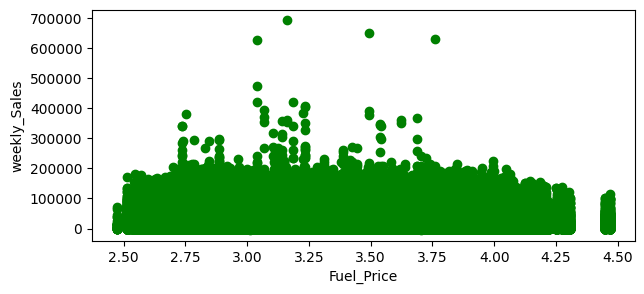

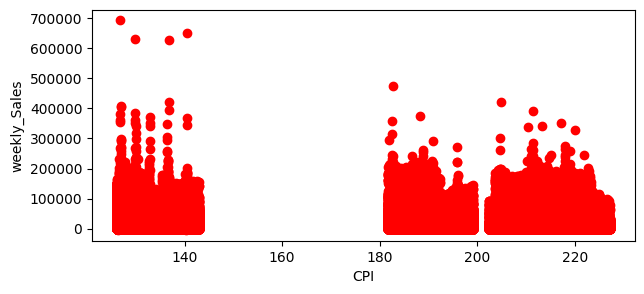

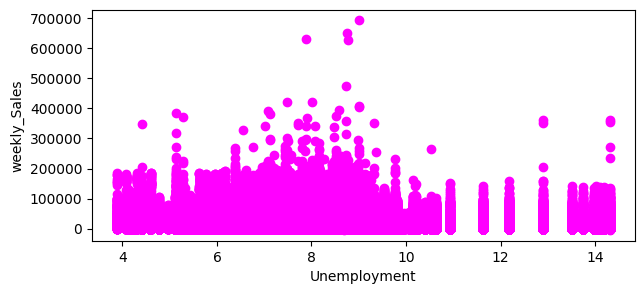

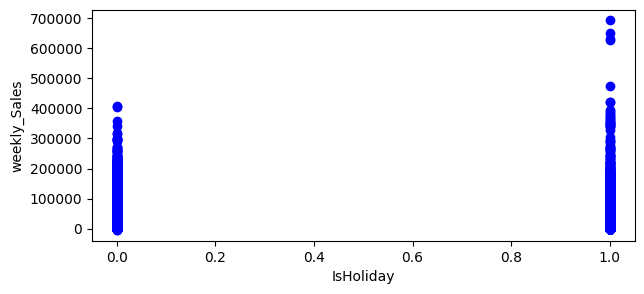

In [45]:
scatter(train_merge, 'Store')
scatter(train_merge, 'Dept')
scatter(train_merge, 'Size')
scatter(train_merge, 'Type')
scatter(train_merge, 'Temperature')
scatter(train_merge, 'Fuel_Price')
scatter(train_merge, 'CPI')
scatter(train_merge, 'Unemployment')
scatter(train_merge, 'IsHoliday')

In [46]:
train_merge['Year'].unique()

array([2010, 2011, 2012])

<Axes: xlabel='Week'>

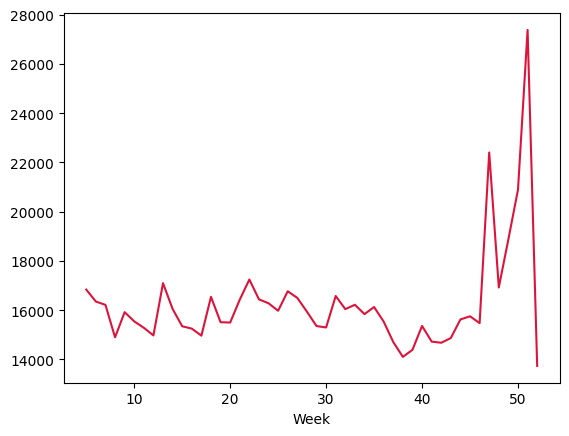

In [47]:
#Average weekly sales for the year 2010
weekly_sales_2010 = train_merge[train_merge['Year']==2010]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values, color=random.choice(colors))

<Axes: xlabel='Week'>

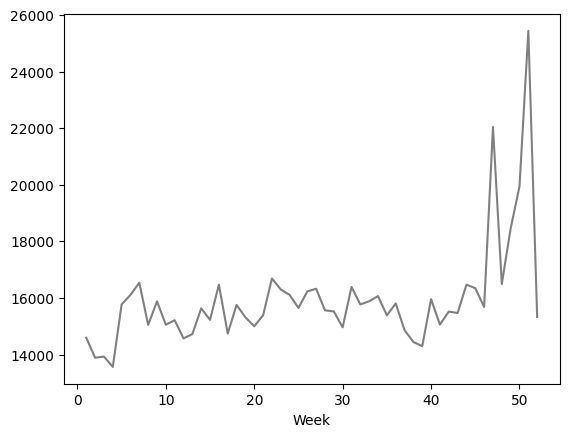

In [48]:
#Average weekly sales for the year 2011
weekly_sales_2011 = train_merge[train_merge['Year']==2011]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values, color=random.choice(colors))

<Axes: xlabel='Week'>

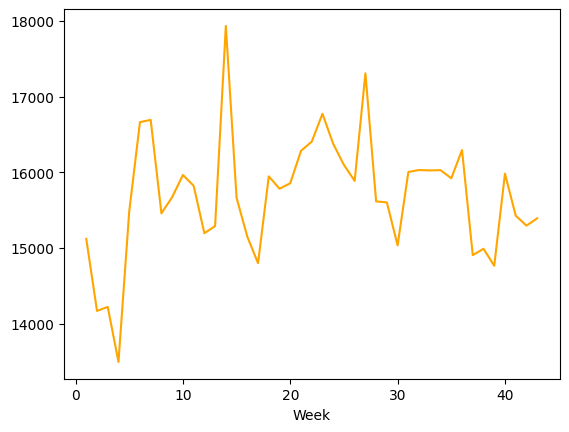

In [49]:
#Average weekly sales for the year 2012
weekly_sales_2012 = train_merge[train_merge['Year']==2012]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values, color=random.choice(colors))

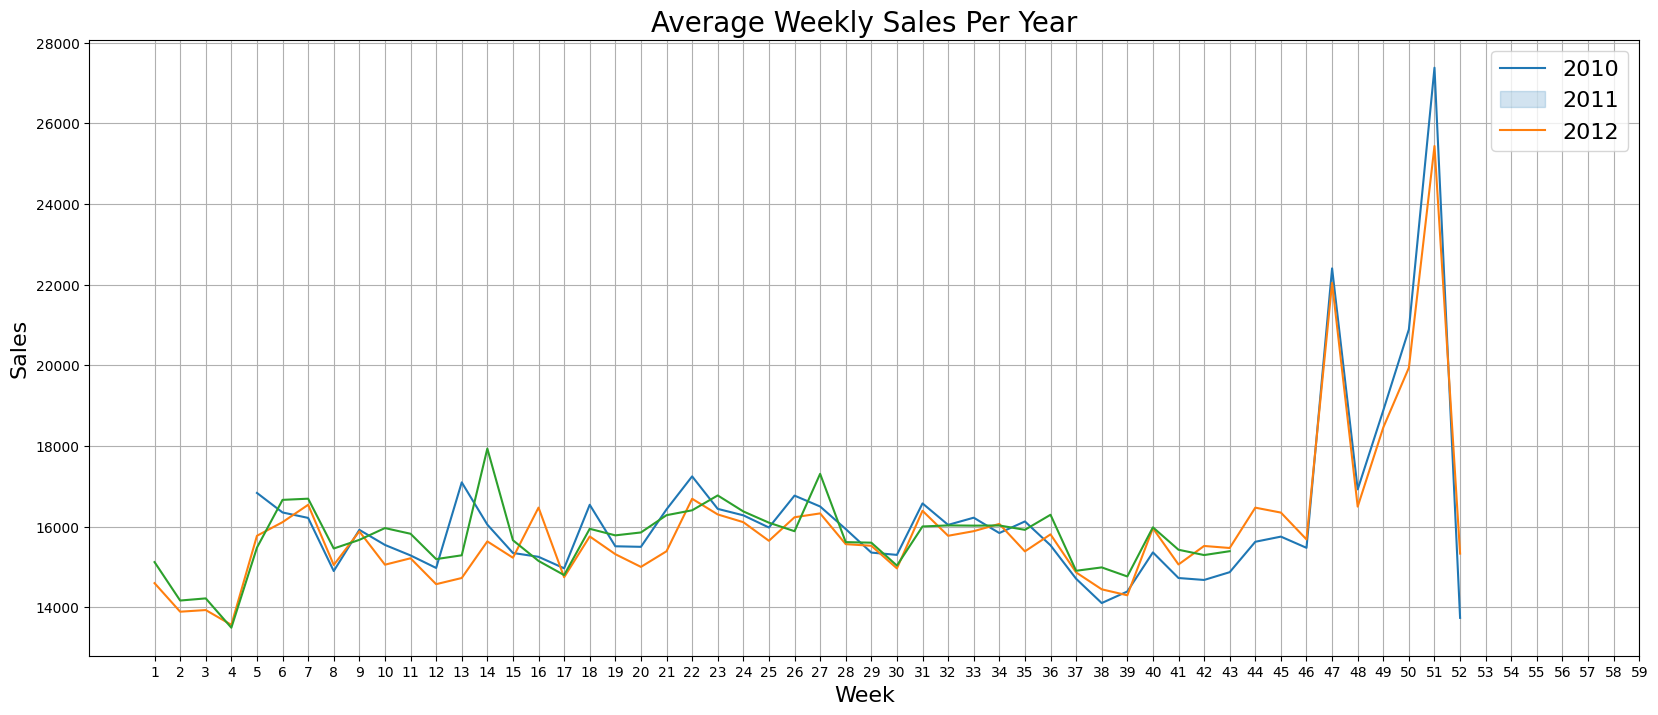

In [50]:
# Comparing the average weekly sales of 2010, 2011 and 2012

plt.figure(figsize=(20,8))
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values)
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60,1))
plt.legend(['2010', '2011', '2012'], loc="best", fontsize=16)
plt.title("Average Weekly Sales Per Year", fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

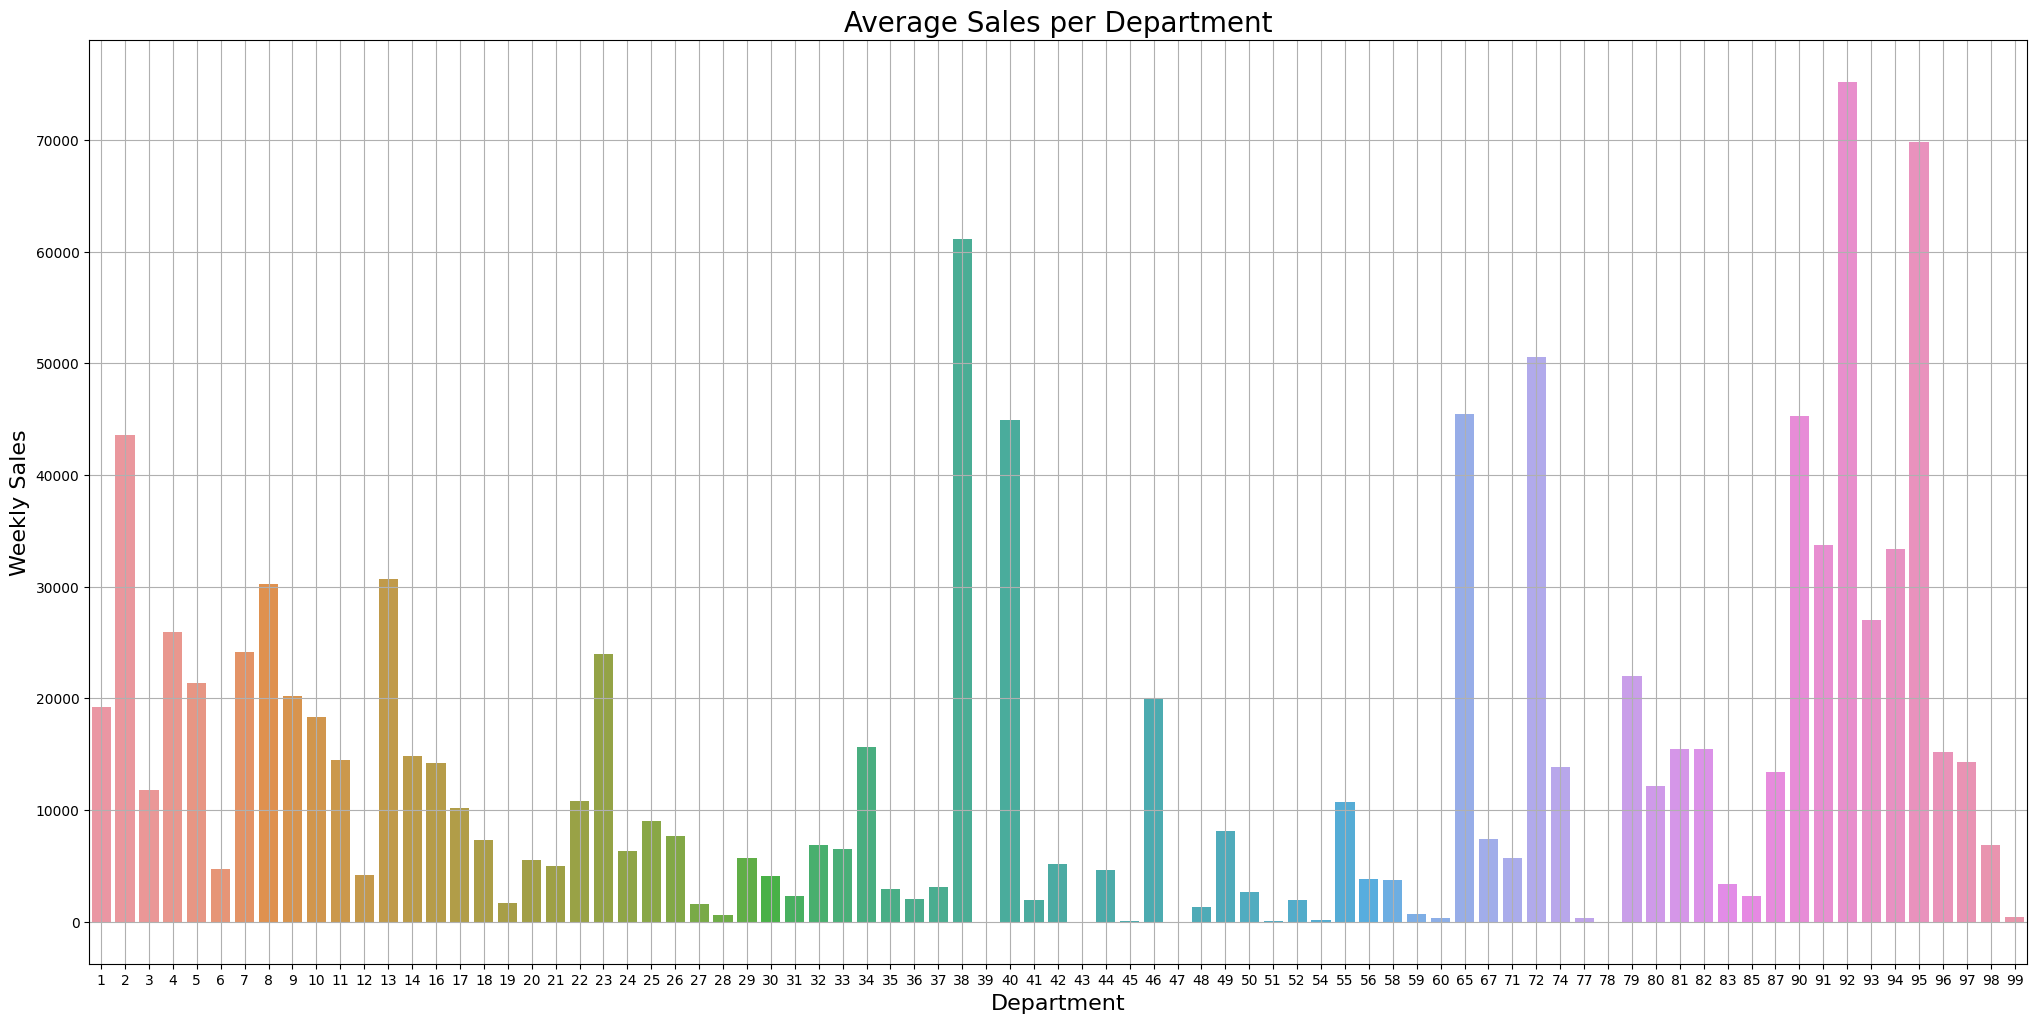

In [51]:
# Average Sales per department

weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Dept']).mean()
plt.figure(figsize=(25,12))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.grid()
plt.title("Average Sales per Department", fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Weekly Sales', fontsize=16)
plt.show()

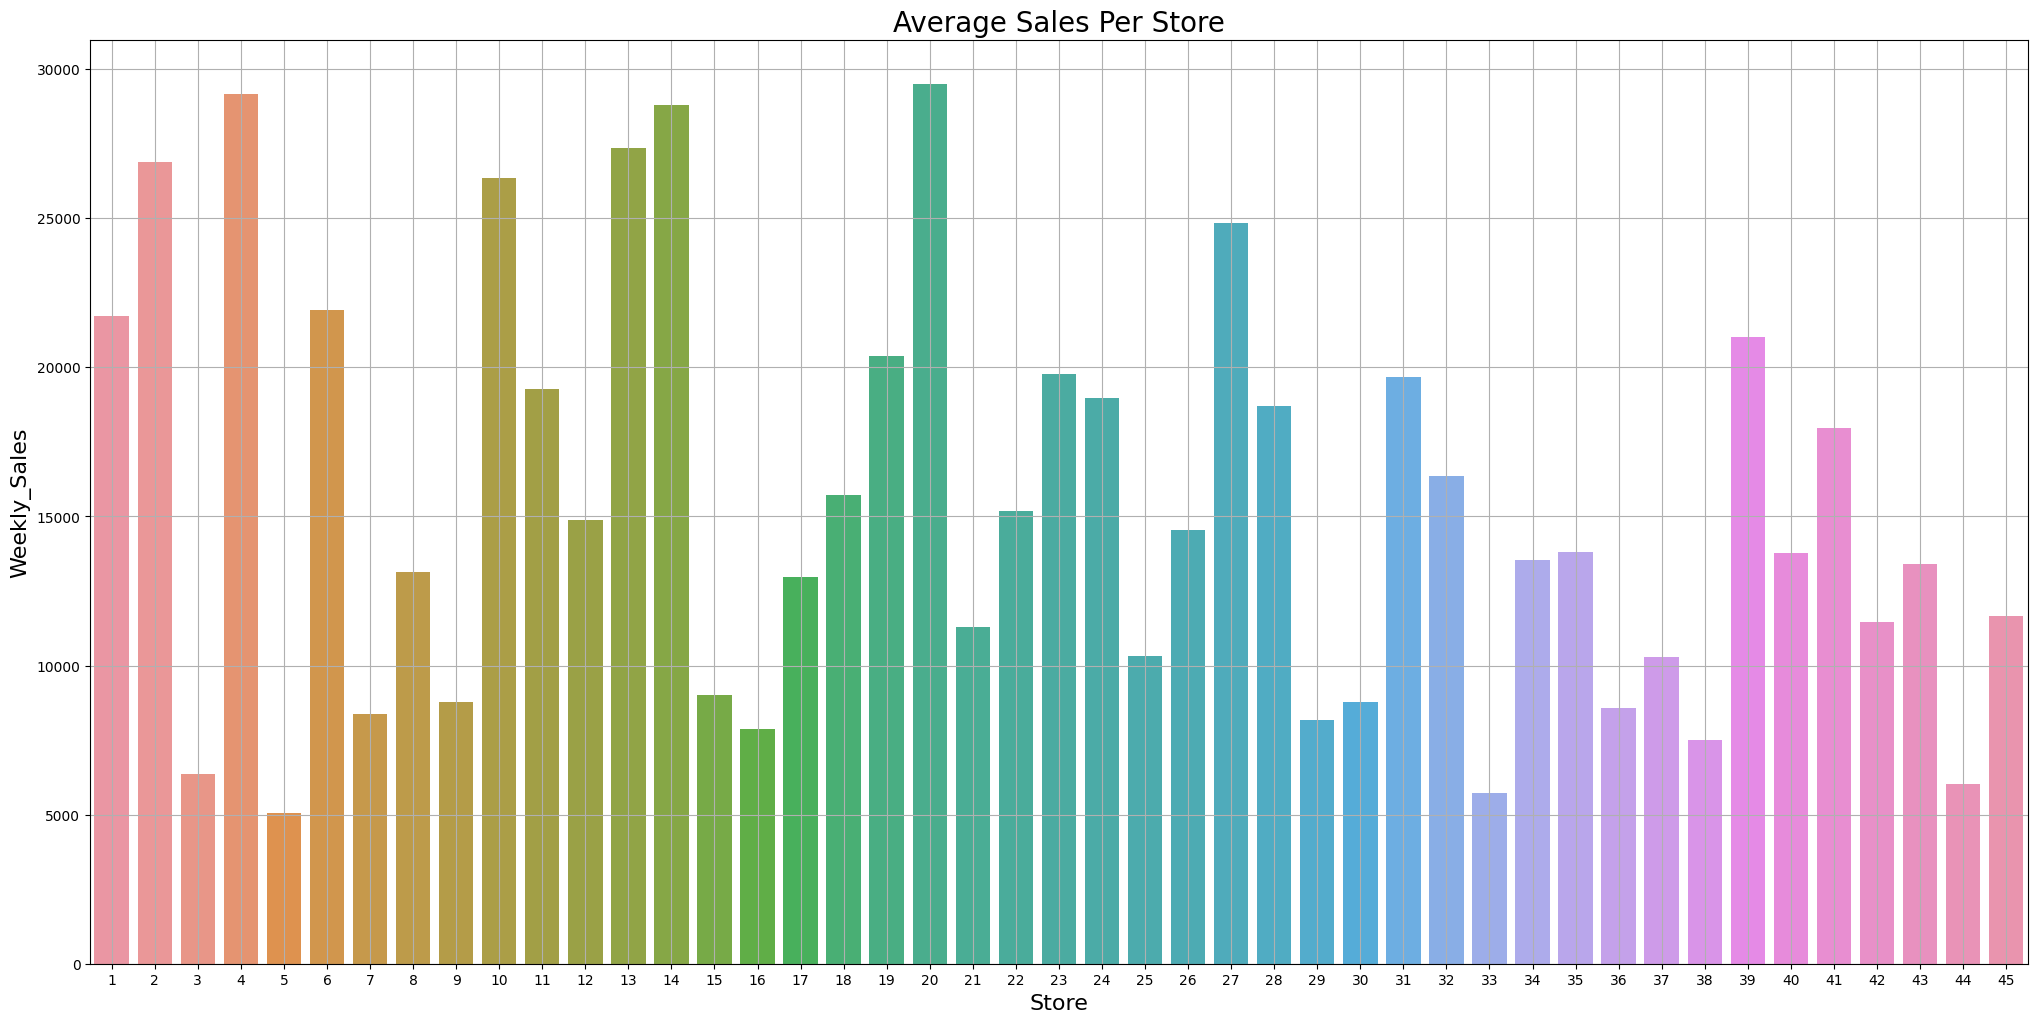

In [52]:
# Average sales per Store

weekly_sales = train_merge["Weekly_Sales"].groupby(train_merge['Store']).mean()
plt.figure(figsize=(25,12))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title("Average Sales Per Store", fontsize=20)
plt.grid()
plt.xlabel("Store", fontsize=16)
plt.ylabel("Weekly_Sales", fontsize=16)
plt.show()

<Axes: >

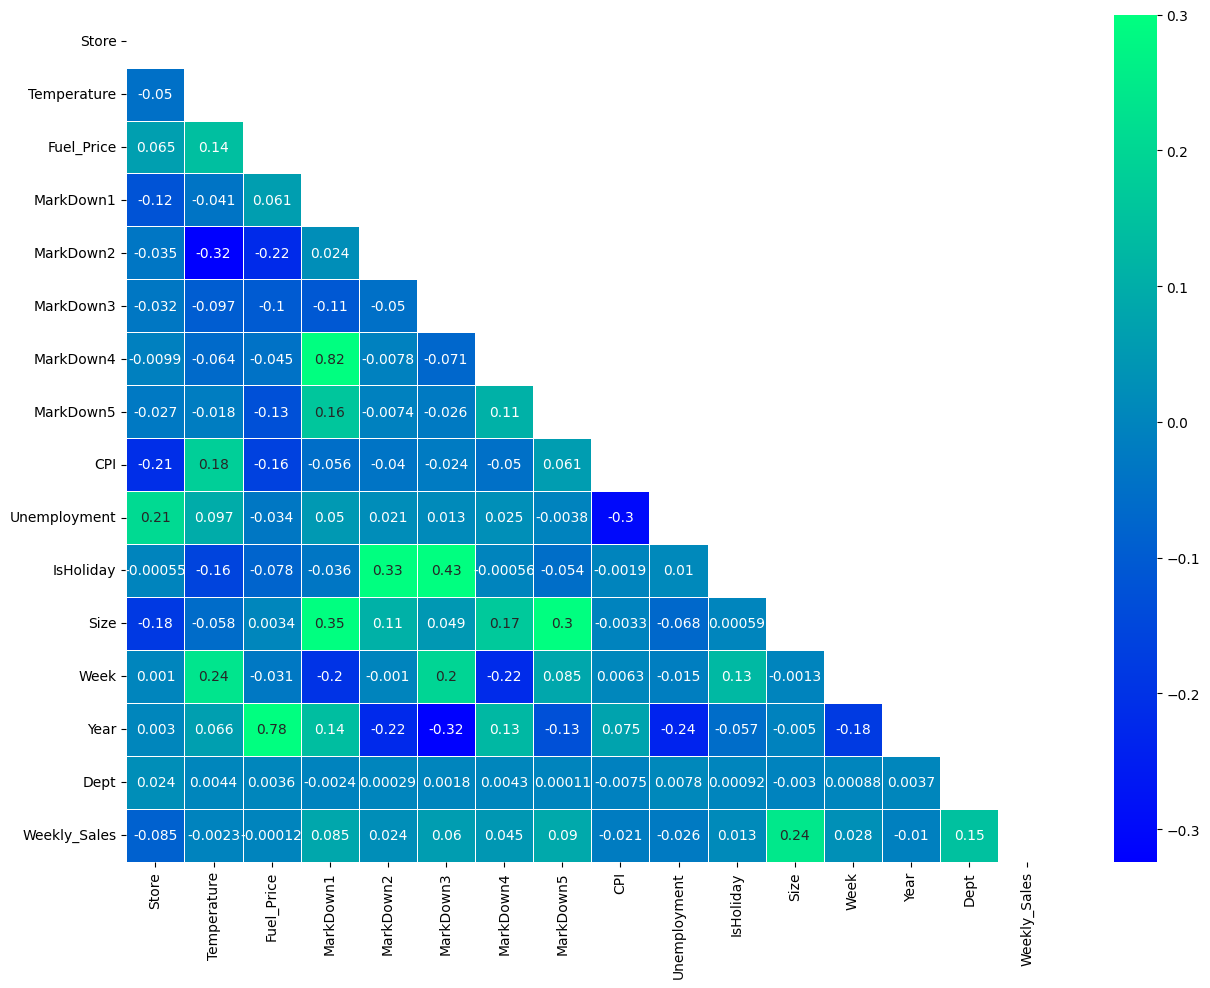

In [53]:
plt.figure(figsize=(15,11))
corr = train_merge.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, linewidths=.5, cmap='winter', annot=True)

In [54]:
train_merge = train_merge.drop(['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)
test_merge = test_merge.drop(['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

In [55]:
train_merge

Store       Date  Temperature         CPI  Unemployment  IsHoliday  \
0           1 2010-02-05        42.31  211.096358         8.106      False   
1           1 2010-02-12        38.51  211.242170         8.106       True   
2           1 2010-02-19        39.93  211.289143         8.106      False   
3           1 2010-02-26        46.63  211.319643         8.106      False   
4           1 2010-03-05        46.50  211.350143         8.106      False   
...       ...        ...          ...         ...           ...        ...   
421565     45 2012-09-28        64.88  192.013558         8.684      False   
421566     45 2012-10-05        64.89  192.170412         8.667      False   
421567     45 2012-10-12        54.47  192.327265         8.667      False   
421568     45 2012-10-19        56.47  192.330854         8.667      False   
421569     45 2012-10-26        58.85  192.308899         8.667      False   

       Type    Size  Week  Year  Dept  Weekly_Sales  
0         A  151315     5  2010     1      24924.50  
1         A  151315     6  2010     1      46039.49  
2         A  151315     7  2010     1      41595.55  
3         A  151315     8  2010     1      19403.54  
4         A  151315     9  2010     1      21827.90  
...     ...     ...   ...   ...   ...           ...  
421565    B  118221    39  2012    98        508.37  
421566    B  118221    40  2012    98        628.10  
421567    B  118221    41  2012    98       1061.02  
421568    B  118221    42  2012    98        760.01  
421569    B  118221    43  2012    98       1076.80  

[421570 rows x 12 columns]

In [56]:
train_merge['Dept'].nunique()

81

In [57]:
train_merge['Store'].nunique()

45

In [58]:
train_merge.columns

Index(['Store', 'Date', 'Temperature', 'CPI', 'Unemployment', 'IsHoliday',
       'Type', 'Size', 'Week', 'Year', 'Dept', 'Weekly_Sales'],
      dtype='object')

##Buliding and Training the model

In [59]:
x = train_merge[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Year']]
y = train_merge['Weekly_Sales']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, random_state=42)
x_train

Store  Dept  IsHoliday    Size  Week  Year
338670     35    82      False  103681    40  2010
165121     17    74      False   93188    21  2011
9708        1    95      False  151315     5  2011
275300     28    82      False  206302     8  2012
84869       9    54      False  125833    32  2011
...       ...   ...        ...     ...   ...   ...
259178     27    18      False  204184    42  2012
365838     39    36      False  184109    20  2010
131932     14    29      False  200898    17  2010
146867     15    90      False  123737    26  2011
121958     13    32      False  219622    41  2011

[295099 rows x 6 columns]

In [61]:
# Performing GridSearchCV on Ridge Regression

params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv=7, scoring='neg_mean_absolute_error', n_jobs=-1)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [62]:
# Predicting train and test result

y_train_pred = ridge_regressor.predict(x_train)
y_test_pred = ridge_regressor.predict(x_test)

In [63]:
print("Train results for Ridge Regression Model: ")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared Error: ", r2_score(y_train.values, y_train_pred))

Train results for Ridge Regression Model: 
Root Mean Squared Error:  21696.189989134735
R-squared Error:  0.08442134387348998


In [64]:
print("Test results for Ridge Regression Model: ")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred)))
print("R-squared Error: ", r2_score(y_test.values, y_test_pred))

Test results for Ridge Regression Model: 
Root Mean Squared Error:  21811.998658223216
R-squared Error:  0.08452464107207469


In [65]:
# Performing GridSearchCV on Lasso Regression

params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params, cv=7, scoring='neg_mean_absolute_error', n_jobs=-1)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [66]:
# Predicting Test and Train results

y_train_pred = lasso_regressor.predict(x_train)
y_test_pred = lasso_regressor.predict(x_test)

In [67]:
print("Train results for Lasso regression: ")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared Error: ", r2_score(y_train.values, y_train_pred))

Train results for Lasso regression: 
Root Mean Squared Error:  21975.472790897762
R-squared Error:  0.060698178849947215


In [68]:
print("Test results for Lasso regression: ")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred)))
print("R-squared Error: ", r2_score(y_test.values, y_test_pred))

Test results for Lasso regression: 
Root Mean Squared Error:  22092.154357868425
R-squared Error:  0.06085668250157994


In [69]:
# Performing GridSearchCV on Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
tree.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [70]:
# Predicting train and test results on tree
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [71]:
print("Train results for Decision Tree Regressor Model: ")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared Error: ", r2_score(y_train.values, y_train_pred))

Train results for Decision Tree Regressor Model: 
Root Mean Squared Error:  1669.9522330237903
R-squared Error:  0.994575786101917


In [72]:
print("Test results for Decision Tree Regressor Model: ")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred)))
print("R-squared Error: ", r2_score(y_test.values, y_test_pred))

Test results for Decision Tree Regressor Model: 
Root Mean Squared Error:  4923.514544973242
R-squared Error:  0.9533548831724294


In [73]:
# Performing RandomSearchCV on Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
tuned_params = {'n_estimators':[100,200], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=3, scoring='neg_mean_absolute_error', n_jobs=-1)
random_regressor.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_absolute_error')

In [74]:
# Predicting train and test results
y_train_pred = random_regressor.predict(x_train)
y_test_pred = random_regressor.predict(x_test)

In [75]:
print("Train results for Random Forest Regressor Model: ")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared Error: ", r2_score(y_train.values, y_train_pred))

Train results for Random Forest Regressor Model: 
Root Mean Squared Error:  1261.6257404422945
R-Squared Error:  0.9969040795584826


In [76]:
print("Test results for Random Forest Regressor Model: ")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred)))
print("R-Squared Error: ", r2_score(y_test.values, y_test_pred))

Test results for Random Forest Regressor Model: 
Root Mean Squared Error:  3728.910818460778
R-Squared Error:  0.9732440898879052
